# Scikit-learn 배우기: 파이썬과 기계 학습

## 2장 : 지도 학습 - 서포트 벡터 머신과 이미지 인식

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


olivetti 얼굴 데이터셋 임포트한다.


In [2]:
from sklearn.datasets import fetch_olivetti_faces

# 얼굴 데이터를 가져온다
faces = fetch_olivetti_faces()

print faces.DESCR

downloading Olivetti faces from http://cs.nyu.edu/~roweis/data/olivettifaces.mat to C:\Users\chulw\scikit_learn_data
Modified Olivetti faces dataset.

The original database was available from (now defunct)

    http://www.uk.research.att.com/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



데이터를 살펴보자. faces.images는 64x64 픽셀의 매트릭스로 구성된 얼굴 400개 이미지를 포함한다.faces.data는 매트릭스를 대신해 4096(64x64) 속성 열의 데이터를 포함한다.

In [3]:
print faces.keys()
print faces.images.shape
print faces.data.shape
print faces.target.shape


['images', 'data', 'target', 'DESCR']
(400L, 64L, 64L)
(400L, 4096L)
(400L,)


데이트는 이미 정규화되어 있다.

In [4]:
print np.max(faces.data)
print np.min(faces.data)
print np.mean(faces.data)

1.0
0.0
0.547043


처음 20개 이미지를 그린다. 40명의 10개 이미지가 있다.

In [5]:
def print_faces(images, target, top_n):
    # 인치로 그림 사이즈를 설정한다
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):
        # 20x20 매트릭스 이미지를 도식한다
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        # 목적값을 이미지에 적는다
        p.text(0, 14, str(target[i]))
        p.text(0, 60, str(i))
    

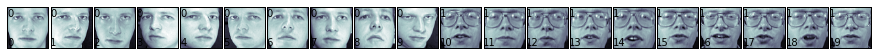

In [6]:
print_faces(faces.images, faces.target, 20)



20x20의 매트릭스로 얼굴을 그린다. 상단 좌측에 목적값과 하단 좌측에 번호를 적는다. 아마 몇 초가 걸린다.


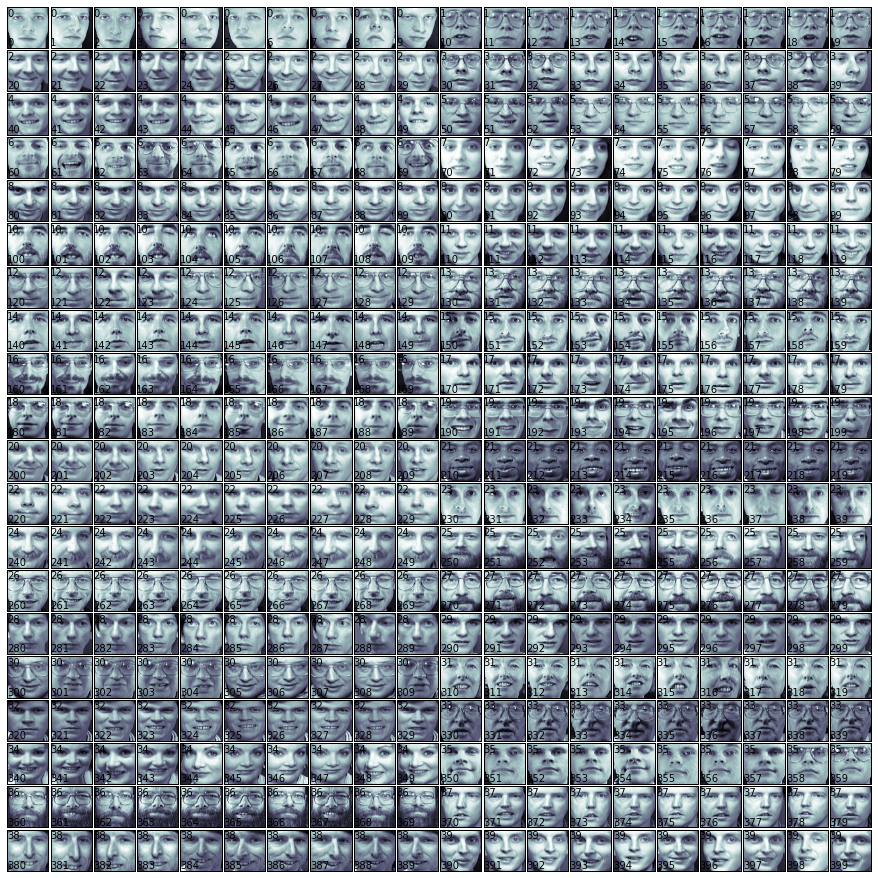

In [7]:
print_faces(faces.images, faces.target, 400)

sklearn.svm 모듈에서 SVC 클래스를 임포트한다. SVC는 앞으로 분류하기 위해 사용할 Support Vector Classifier을 의미한다. sklearn.svm를 보았다면 회귀를 위한 Support Vector Regression을 의미하는 SVR도 볼 수 있다.

In [8]:
from sklearn.svm import SVC
svc_1 = SVC(kernel='linear')
print svc_1

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


훈련 데이터와 테스트 데이터를 만든다.

In [9]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        faces.data, faces.target, test_size=0.25, random_state=0)

5-중첩 교차 검증을 수행한다.

In [10]:
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y, K):
    # k-중첩 교차 검증 생성기를 만든다
    cv = KFold(len(y), K, shuffle=True, random_state=0)
    # 기본적으로 점수 함수는 에스터메이터의 점수 함수로 반환된 함수를 사용한다(정확도)
    scores = cross_val_score(clf, X, y, cv=cv)
    print scores
    print ("Mean score: {0:.3f} (+/-{1:.3f})").format(
        np.mean(scores), sem(scores))

In [11]:
evaluate_cross_validation(svc_1, X_train, y_train, 5)

[ 0.93333333  0.86666667  0.91666667  0.93333333  0.91666667]
Mean score: 0.913 (+/-0.012)


In [12]:
from sklearn import metrics

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print "Accuracy on training set:"
    print clf.score(X_train, y_train)
    print "Accuracy on testing set:"
    print clf.score(X_test, y_test)
    
    y_pred = clf.predict(X_test)
    
    print "Classification Report:"
    print metrics.classification_report(y_test, y_pred)
    print "Confusion Matrix:"
    print metrics.confusion_matrix(y_test, y_pred)

In [13]:
train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.99
Classification Report:
             precision    recall  f1-score   support

          0       0.86      1.00      0.92         6
          1       1.00      1.00      1.00         4
          2       1.00      1.00      1.00         2
          3       1.00      1.00      1.00         1
          4       1.00      1.00      1.00         1
          5       1.00      1.00      1.00         5
          6       1.00      1.00      1.00         4
          7       1.00      0.67      0.80         3
          9       1.00      1.00      1.00         1
         10       1.00      1.00      1.00         4
         11       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         5
         15       1.00      1.00      1.00         3
         17       1.00      1.00      1.00         6
         19    

안경을 쓰지 않는 사람의 이미지를 분류하도록 한다.

In [14]:
# 안경 쓴 사람의 이미지의 색인
glasses = [
	(10, 19), (30, 32), (37, 38), (50, 59), (63, 64),
	(69, 69), (120, 121), (124, 129), (130, 139), (160, 161),
	(164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
	(194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
	(330, 339), (358, 359), (360, 369)
]

새로운 문제을 위한 훈련 데이터와 테스트 데이터를 만든다.

In [15]:
def create_target(segments):
    # 0으로 새로운 목적 배열 크기를 초기화한다
    y = np.zeros(faces.target.shape[0])
    # 특정 segments에 1를 넣는다
    for (start, end) in segments:
        y[start:end + 1] = 1
    return y

In [16]:
target_glasses = create_target(glasses)

X_train, X_test, y_train, y_test = train_test_split(
        faces.data, target_glasses, test_size=0.25, random_state=0)

선형 커널(linear kernel)로 시도한다.

In [17]:
svc_2 = SVC(kernel='linear')
evaluate_cross_validation(svc_2, X_train, y_train, 5)
train_and_evaluate(svc_2, X_train, X_test, y_train, y_test)

[ 1.          0.95        0.98333333  0.98333333  0.93333333]
Mean score: 0.970 (+/-0.012)
Accuracy on training set:
1.0
Accuracy on testing set:
0.99
Classification Report:
             precision    recall  f1-score   support

        0.0       1.00      0.99      0.99        67
        1.0       0.97      1.00      0.99        33

avg / total       0.99      0.99      0.99       100

Confusion Matrix:
[[66  1]
 [ 0 33]]


아직 이 해결책에 대한 의심이 남아 있다면... 완전히 다른 10개 이미지를 구분한다(같은 사람이 안경 쓰거나 안쓴 이미지). 30부터 39까지 색인으로 구분한다. 390개의 표본으로 훈련하고 평가한다. 이 후, 구분된 10개의 표본으로 평가한다.

In [18]:
X_test = faces.data[30:40]
y_test = target_glasses[30:40]

print y_test.shape[0]

select = np.ones(target_glasses.shape[0])
select[30:40] = 0
X_train = faces.data[select == 1]
y_train = target_glasses[select == 1]

print y_train.shape[0]

10
390


In [19]:
svc_3 = SVC(kernel='linear')
train_and_evaluate(svc_3, X_train, X_test, y_train, y_test)
y_pred = svc_3.predict(X_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.9
Classification Report:
             precision    recall  f1-score   support

        0.0       0.83      1.00      0.91         5
        1.0       1.00      0.80      0.89         5

avg / total       0.92      0.90      0.90        10

Confusion Matrix:
[[5 0]
 [1 4]]


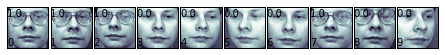

In [20]:
eval_faces = [np.reshape(a, (64, 64)) for a in X_test]
print_faces(eval_faces, y_pred, 10)